In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import folium
from folium.plugins import HeatMap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option("display.max_columns", 50)

### Read Data

In [2]:
df_listing = pd.read_csv('seattle/listings.csv')
df_listing.shape

(3818, 92)

In [3]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,...,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,...,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,...,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,...,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/a

In [4]:
# view the columns with non-numerical columns
print(df_listing.select_dtypes(include='object').columns)
df_listing.select_dtypes(include='object').head()

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,...,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,...,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,NaN,$5.00,4 weeks ago,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,...,"Seattle, WA",US,United States,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,today,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,...,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00,5 weeks ago,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https:

observations:
- experiences_offered: in tis column there is value none --> should be NaN to make it consistent with other columns
- host_response_rate and host_acceptance_rate: those are actullay numeric values --> should be converted to type float64
- price, cleaning_fee, extra_people,...: those currency values contains currency symbols --> should be conterted to type float 64
- host_response_time, host_is_superhost, is_location_exact, property_type, room_type,bed_type, has_availability, requires_license, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification:
those are columns should be categorized

### Clean Data

In [5]:
# experiences_offered: replace none to NaN
df_listing['experiences_offered'] = df_listing['experiences_offered'].replace('none', np.nan)
df_listing['experiences_offered']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
3788   NaN
3789   NaN
3790   NaN
3791   NaN
3792   NaN
3793   NaN
3794   NaN
3795   NaN
3796   NaN
3797   NaN
3798   NaN
3799   NaN
3800   NaN
3801   NaN
3802   NaN
3803   NaN
3804   NaN
3805   NaN
3806   NaN
3807   NaN
3808   NaN
3809   NaN
3810   NaN
3811   NaN
3812   NaN
3813   NaN
3814   NaN
3815   NaN
3816   NaN
3817   NaN
Name: experiences_offered, Length: 3818, dtype: float64

In [6]:
# percentage of missing values
df_listing.isnull().mean().sort_values(ascending=False)

license                             1.000000
experiences_offered                 1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_checkin               0.172342
review_scores_accuracy              0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
first_review                        0.164222
last_review                         0.164222
reviews_per_month                   0.164222
space     

In [7]:
#  drop the columns with missing value proportion greater than 30%
df_listing = df_listing.dropna(thresh=df_listing.shape[0] * 0.7, axis=1)

In [8]:
def convert_special_symbol(df, col, symbol='$,%'):
    if col in df.columns:
        print(col)
        symbol = re.compile('[{}]'.format(symbol))
        df[col] = df[col].apply(lambda x: symbol.sub('', x) if pd.notna(x) else x)
        # convert data type to float64
        df[col] = df[col].astype('float64')

In [9]:
target_columns = ['price', 'monthly_price', 'weekly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']

In [10]:
# deal with special symbols
for col in target_columns:
    convert_special_symbol(df_listing, col)

price
cleaning_fee
extra_people
host_response_rate
host_acceptance_rate


In [11]:
# fill missing values with mean value of the column
fill_mean = lambda col: col.fillna(col.mean())
num_col = list(df_listing.dtypes[df_listing.dtypes != 'object'].index)
df_listing[num_col] = df_listing[num_col].apply(fill_mean)

In [12]:
# deal with categorized data
target_columns = ['host_response_time', 'host_is_superhost', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'has_availability', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [13]:
for col in target_columns:
    df_listing = pd.concat([df_listing.drop(col, axis=1), pd.get_dummies(df_listing[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [14]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'transit',
       ...
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'instant_bookable_t',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'require_guest_profile_picture_t',
       'require_guest_phone_verification_t'],
      dtype='object', length=104)

In [15]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,...,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",96.000000,100.000000,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,98.000000,100.000000,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,67.000000,100.000000,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,94.886798,99.967159,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen

In [16]:
# create picture for blog title
base_map = folium.Map(location=[47.60, -122.24], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df_listing[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data).add_to(base_map)

base_map

### Q&As

#### Q1: Based on the geo-locations, how many clusters can we get for the items in the listing?

In [17]:
coordinates = df_listing.loc[:, ['latitude', 'longitude']]

In [18]:
# using elbow plot to determin the optimal k
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(coordinates)
    distortions.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

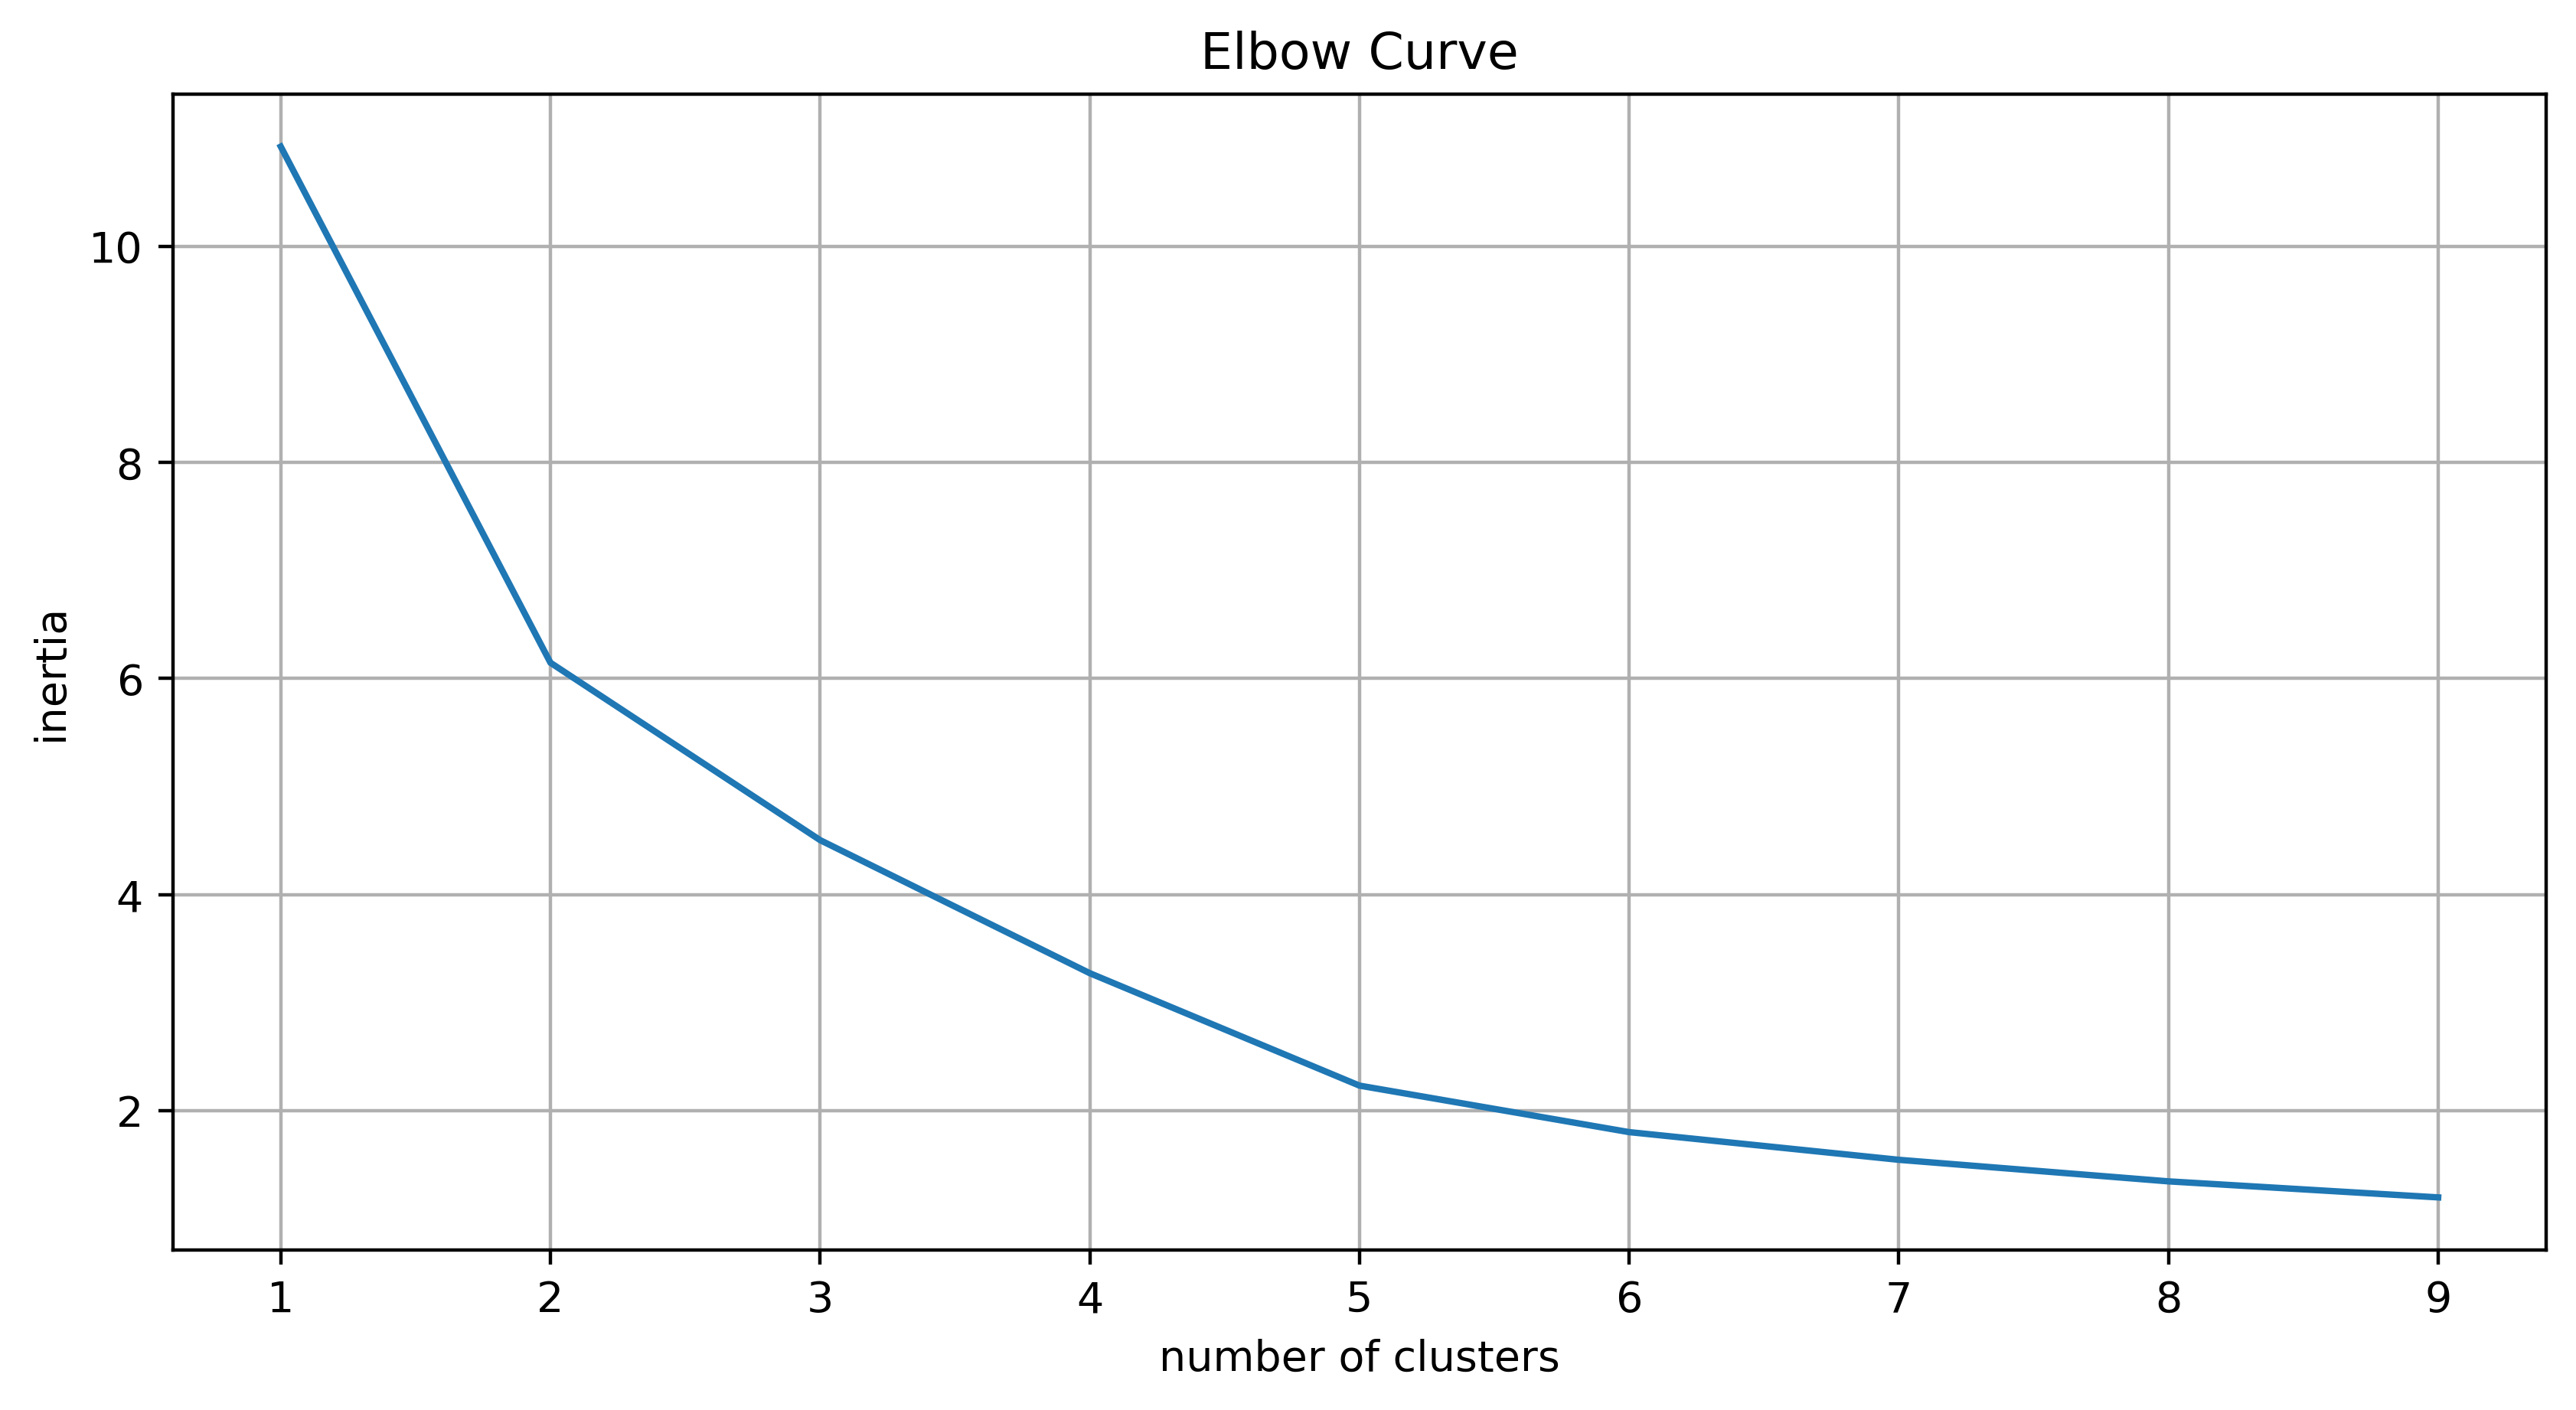

In [19]:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.gca()
ax.set_title('Elbow Curve')
ax.plot(range(1, 10), distortions)
plt.grid(True)
ax.set_xlabel('number of clusters')
ax.set_ylabel('inertia')

#### 6 clusters seems to be a reasonable choice

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(coordinates)
id_label = kmeans.labels_

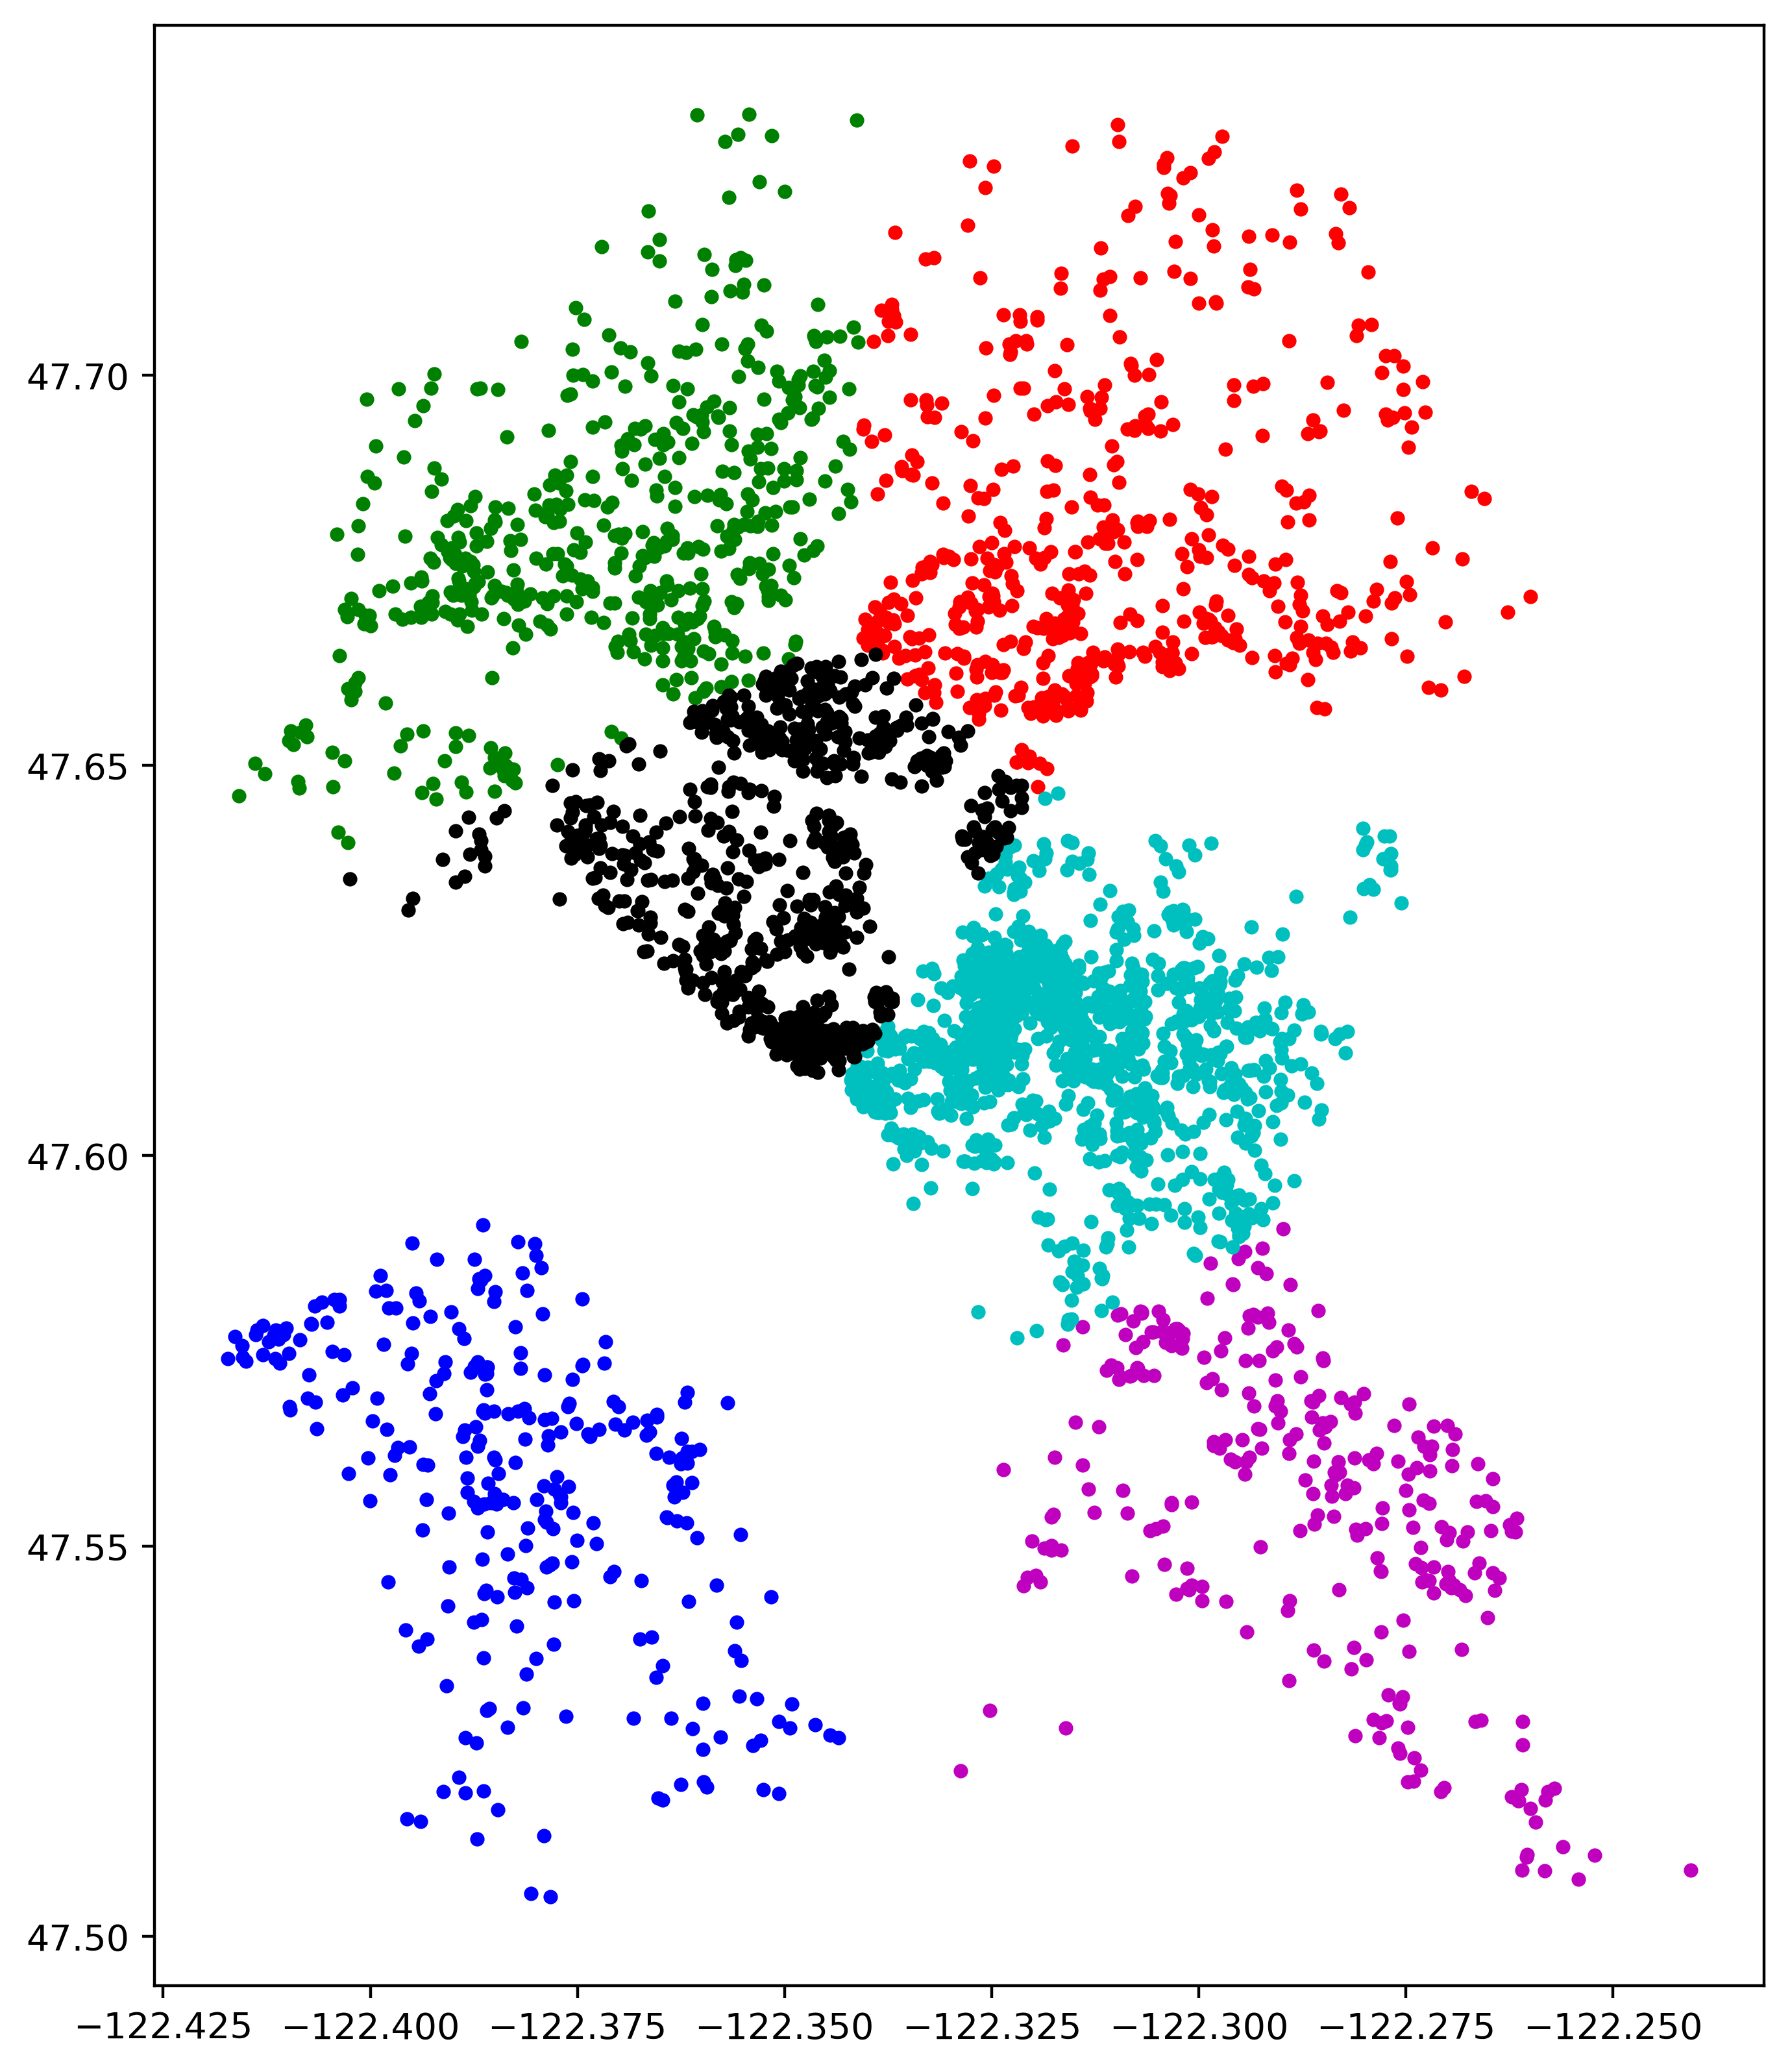

In [21]:
cmap = np.array(['b.','r.','m.','g.','c.','k.'])
fig = plt.figure(figsize=(8,10), dpi=200)
ax = fig.gca()
for i in range(6):
    cluster = np.where(id_label==i)[0]
    ax.plot(coordinates.longitude[cluster].values, coordinates.latitude[cluster].values,cmap[i]) 

In [22]:
# add geo-label to the dataframe
df_listing['geo-label'] = id_label

#### Q2: Is the geo-clusters correlated with the price?

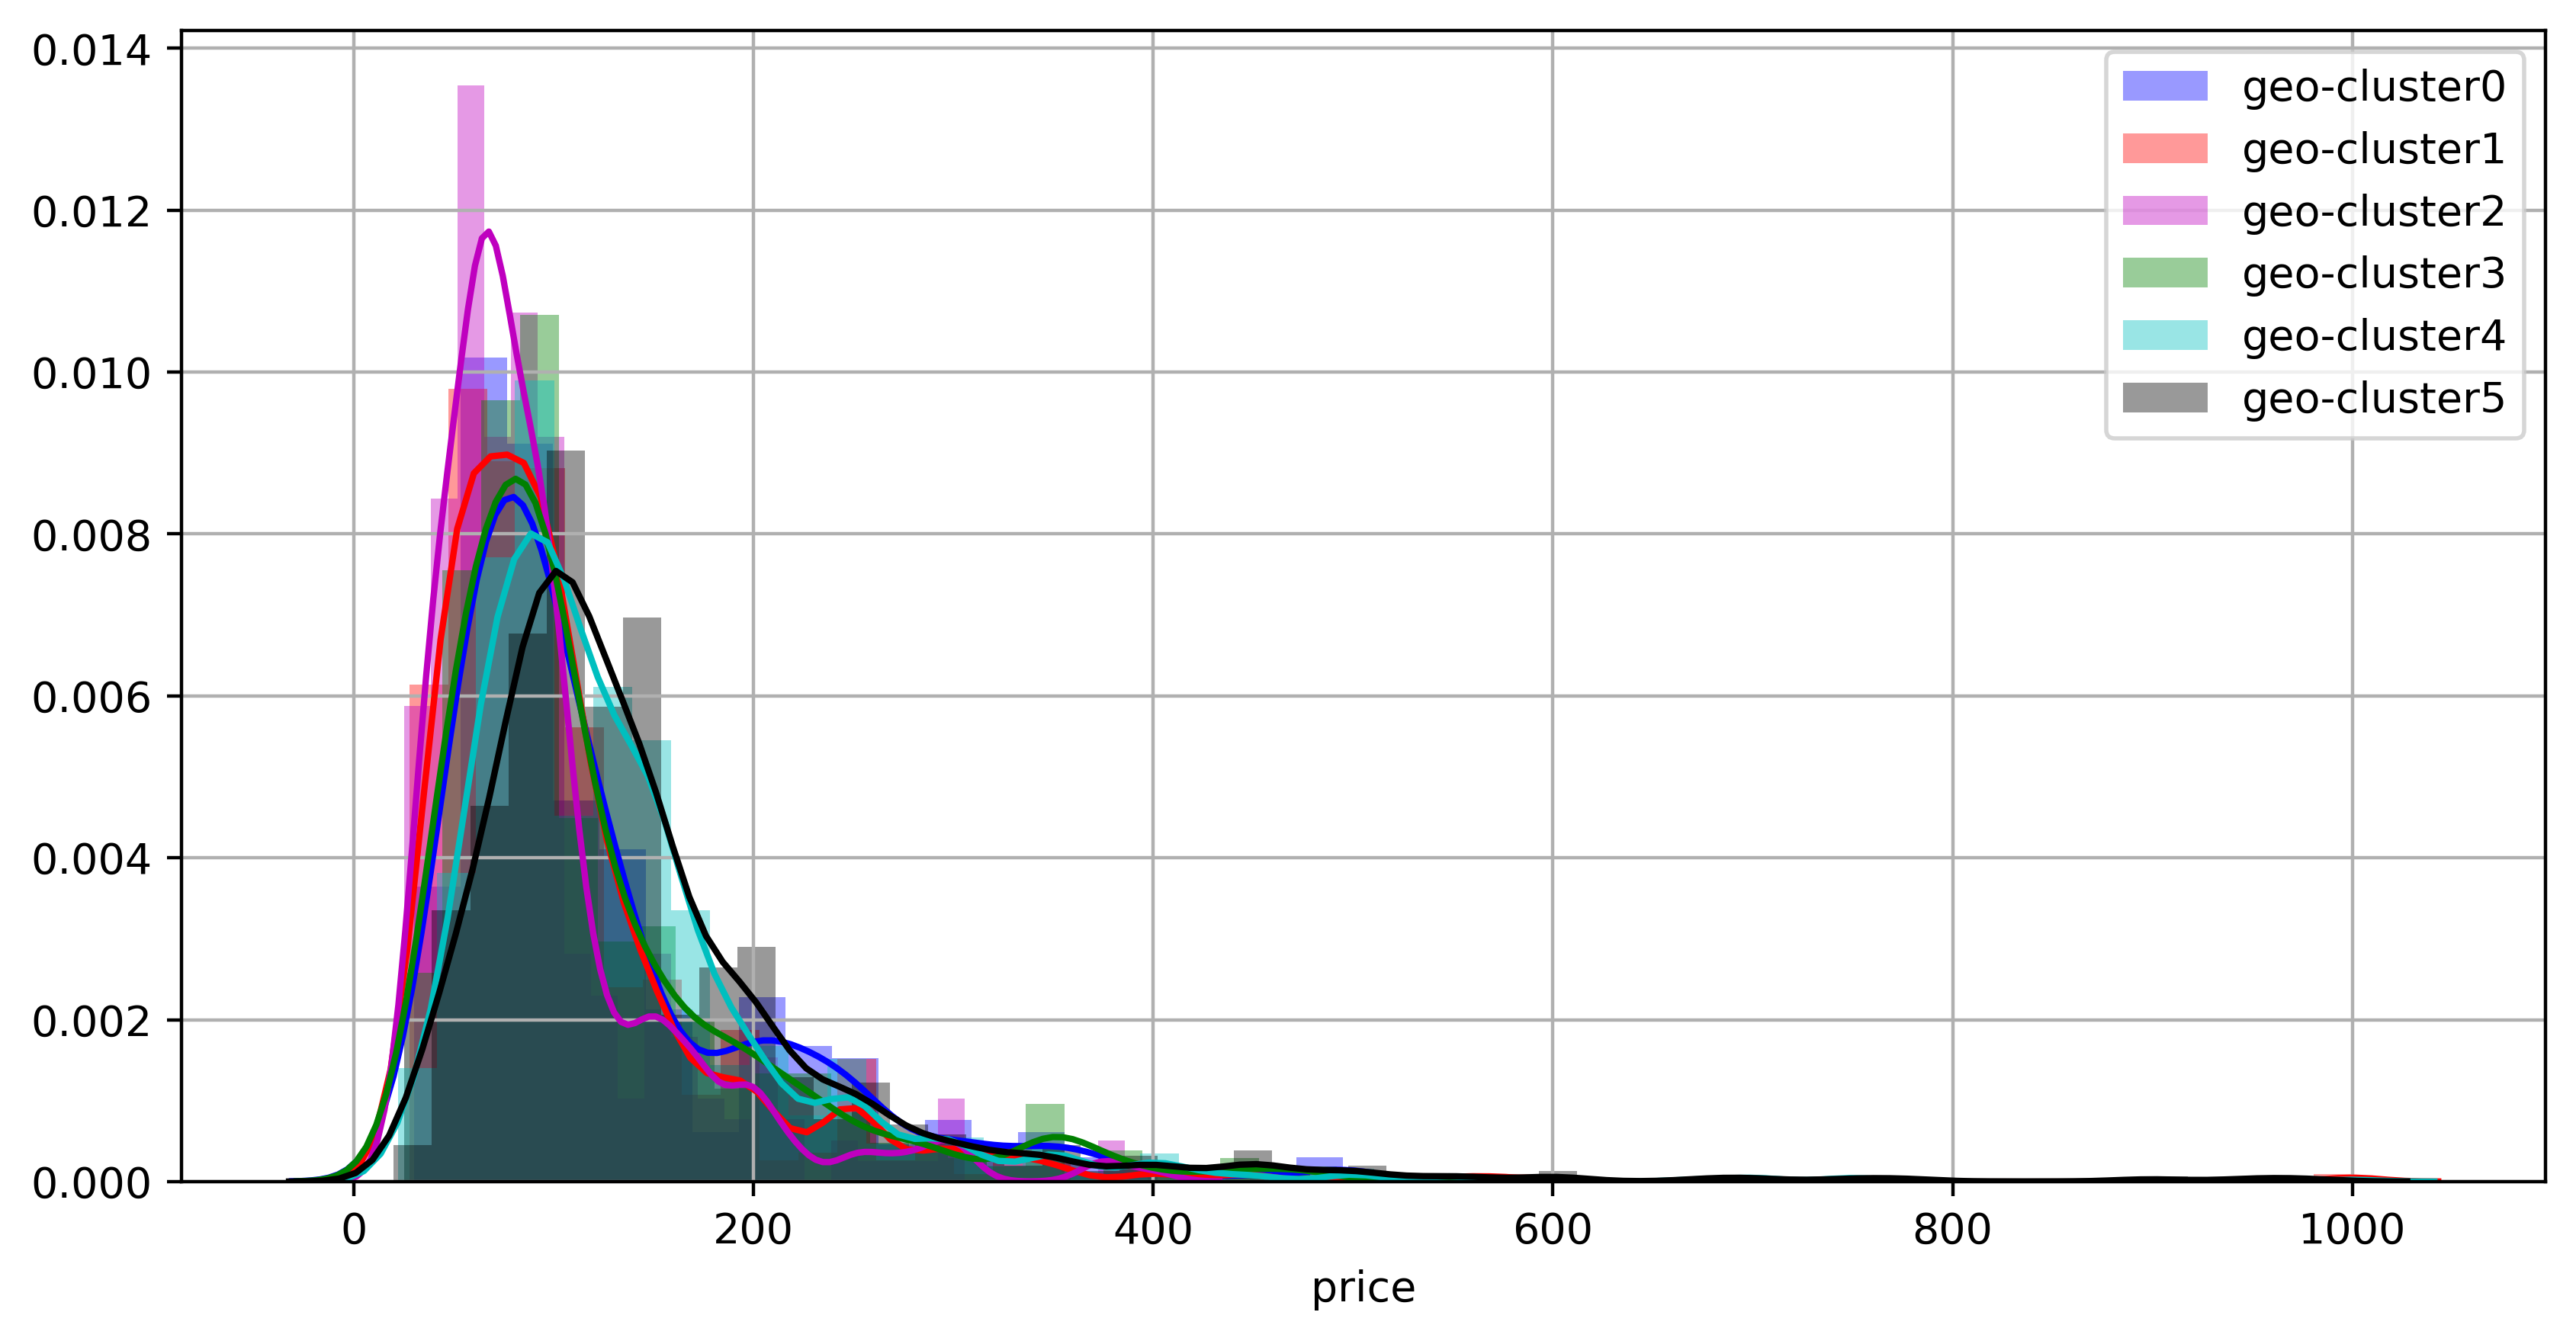

In [23]:
# plot the distribution of price in each geo-cluster
fig = plt.figure(figsize=(10,5), dpi=200)
ax_hist = fig.gca()
for i in range(6):
    sns.distplot(df_listing[df_listing['geo-label']==i]['price'] , color=cmap[i][0], label="geo-cluster{}".format(i), ax=ax_hist)
plt.legend()
plt.grid()

In [24]:
# print out the statistics
for i in range(6):
    print('Statistics for geo-cluster{}:'.format(i))
    print(df_listing[df_listing['geo-label']==i]['price'].describe())
    print('-----------------------------')

Statistics for geo-cluster0:
count    283.000000
mean     125.106007
std       82.803125
min       30.000000
25%       70.000000
50%       97.000000
75%      150.000000
max      495.000000
Name: price, dtype: float64
-----------------------------
Statistics for geo-cluster1:
count     578.000000
mean      108.802768
std        81.231141
min        28.000000
25%        60.000000
50%        90.000000
75%       125.000000
max      1000.000000
Name: price, dtype: float64
-----------------------------
Statistics for geo-cluster2:
count    293.000000
mean      94.580205
std       60.440545
min       25.000000
25%       60.000000
50%       79.000000
75%      105.000000
max      399.000000
Name: price, dtype: float64
-----------------------------
Statistics for geo-cluster3:
count    538.000000
mean     120.771375
std       82.900592
min       25.000000
25%       69.000000
50%       95.000000
75%      149.000000
max      550.000000
Name: price, dtype: float64
-----------------------------
Stat

In [25]:
# most expensive room and cheapest room location
most_expensive_location = df_listing.iloc[df_listing['price'].idxmax()][['latitude', 'longitude']]
cheapest_location = df_listing.iloc[df_listing['price'].idxmin()][['latitude', 'longitude']]

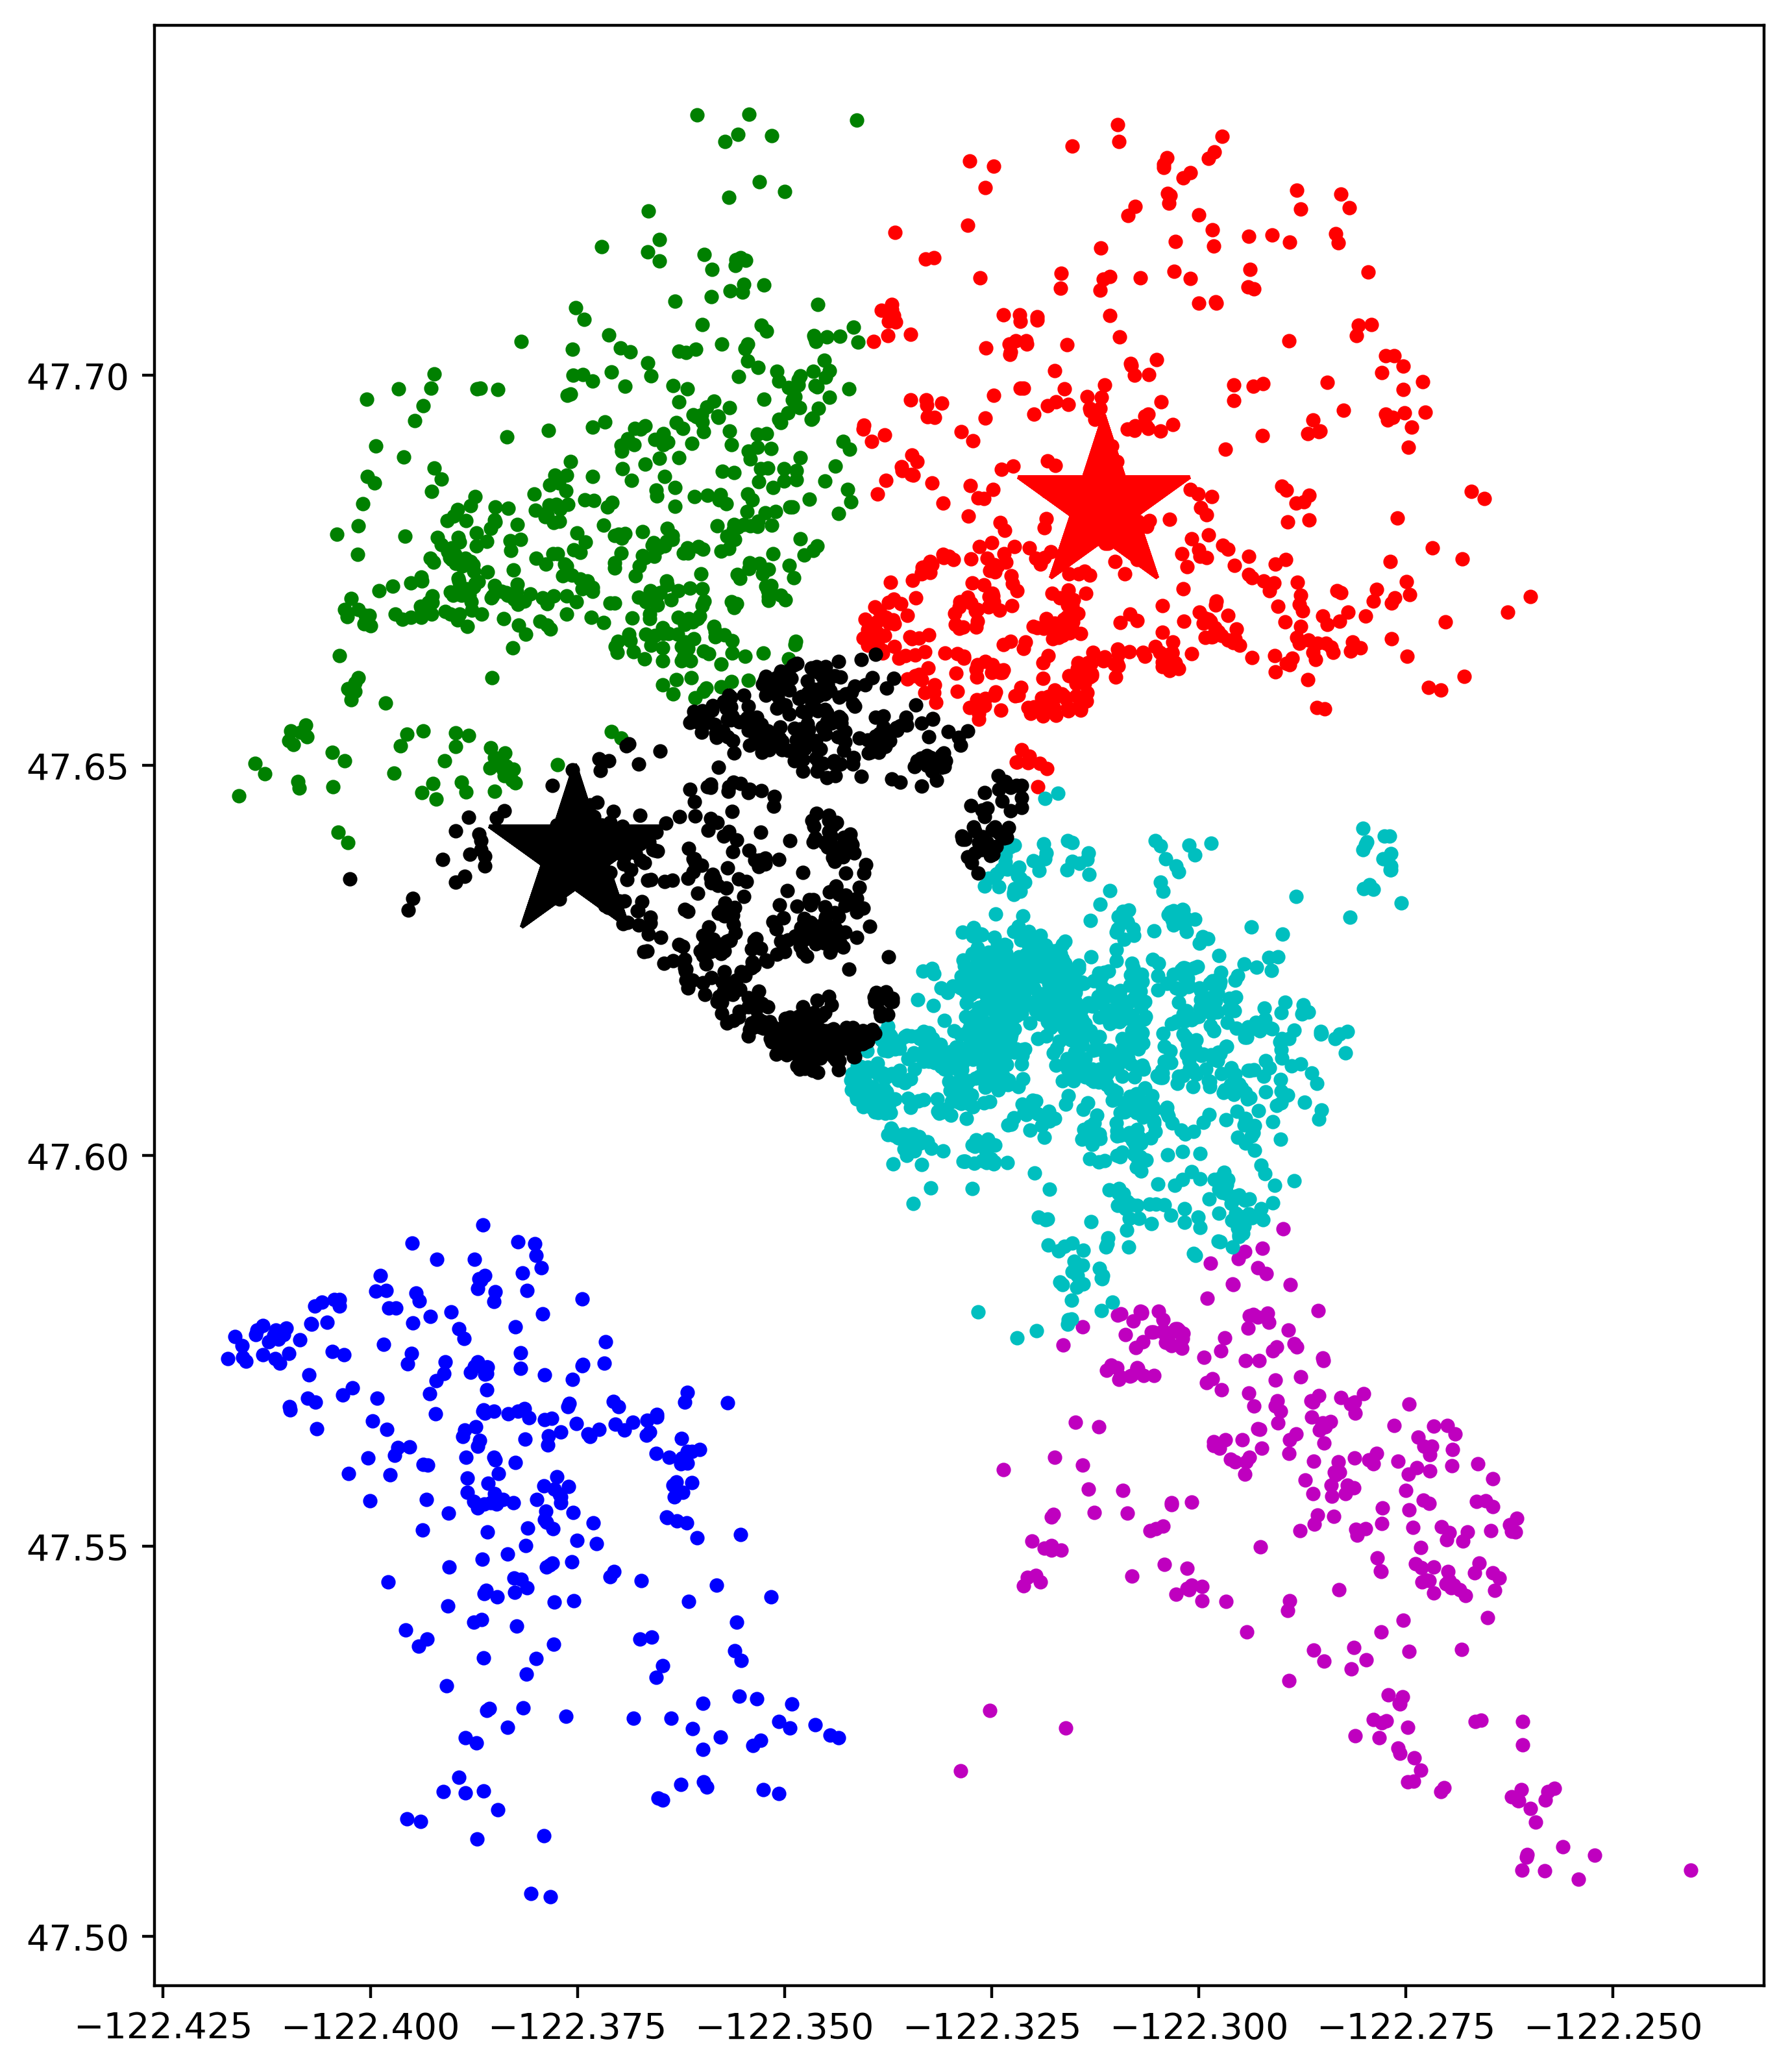

In [35]:
cmap = np.array(['b.','r.','m.','g.','c.','k.'])
fig = plt.figure(figsize=(8,10), dpi=200)
ax = fig.gca()
for i in range(6):
    cluster = np.where(id_label==i)[0]
    ax.plot(coordinates.longitude[cluster].values, coordinates.latitude[cluster].values,cmap[i]) 
    ax.plot(most_expensive_location.longitude, most_expensive_location.latitude, 'r*', markersize=50)
    ax.plot(cheapest_location.longitude, cheapest_location.latitude, 'k*', markersize=50)

Observations:
- cluster 2 has the lowest average price among the five clusters. Seeing the location plot, we can see that most of the rooms are a little bit far away from the city-center.
- cluster 5 has the highest average price among the five clusters. The rooms in this clusters mainly lies in the city center.
- the most expensive room is in cluster 1, which is not exactly the city center.
- the cheapest room is in cluster 5. It indicates that the room price in cluster 5 varies a lot.
- Geo-location and price have some correlation but not that strong.

#### Q3: During prediction of the price, would the feature 'geo cluster' be helpful?

In [27]:
drop_cols = ['id', 'scrape_id', 'host_id', 'latitude', 'longitude']

In [28]:
df_tar = df_listing.select_dtypes(exclude='object').drop(columns = drop_cols)

In [29]:
# prepare two feature sets for predicting price, one with geocluster, one without
y = df_tar['price']
x = df_tar.drop('price', axis =1)
x_ = x.drop('geo-label', axis=1)

In [43]:
# Random Forest

def fit_random_forest(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
    forest = RandomForestRegressor(n_estimators=500, 
                                   criterion='mse', 
                                   random_state=3, 
                                   n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    fig = plt.figure(figsize=(10,5), dpi=200)
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
                c='lightgreen', marker='s', label='Test data')
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.grid()
    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R2 score train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    return forest

Predict Price with geo clustering:
MSE train: 430.960, test: 3053.176
R2 score train: 0.948, test: 0.602


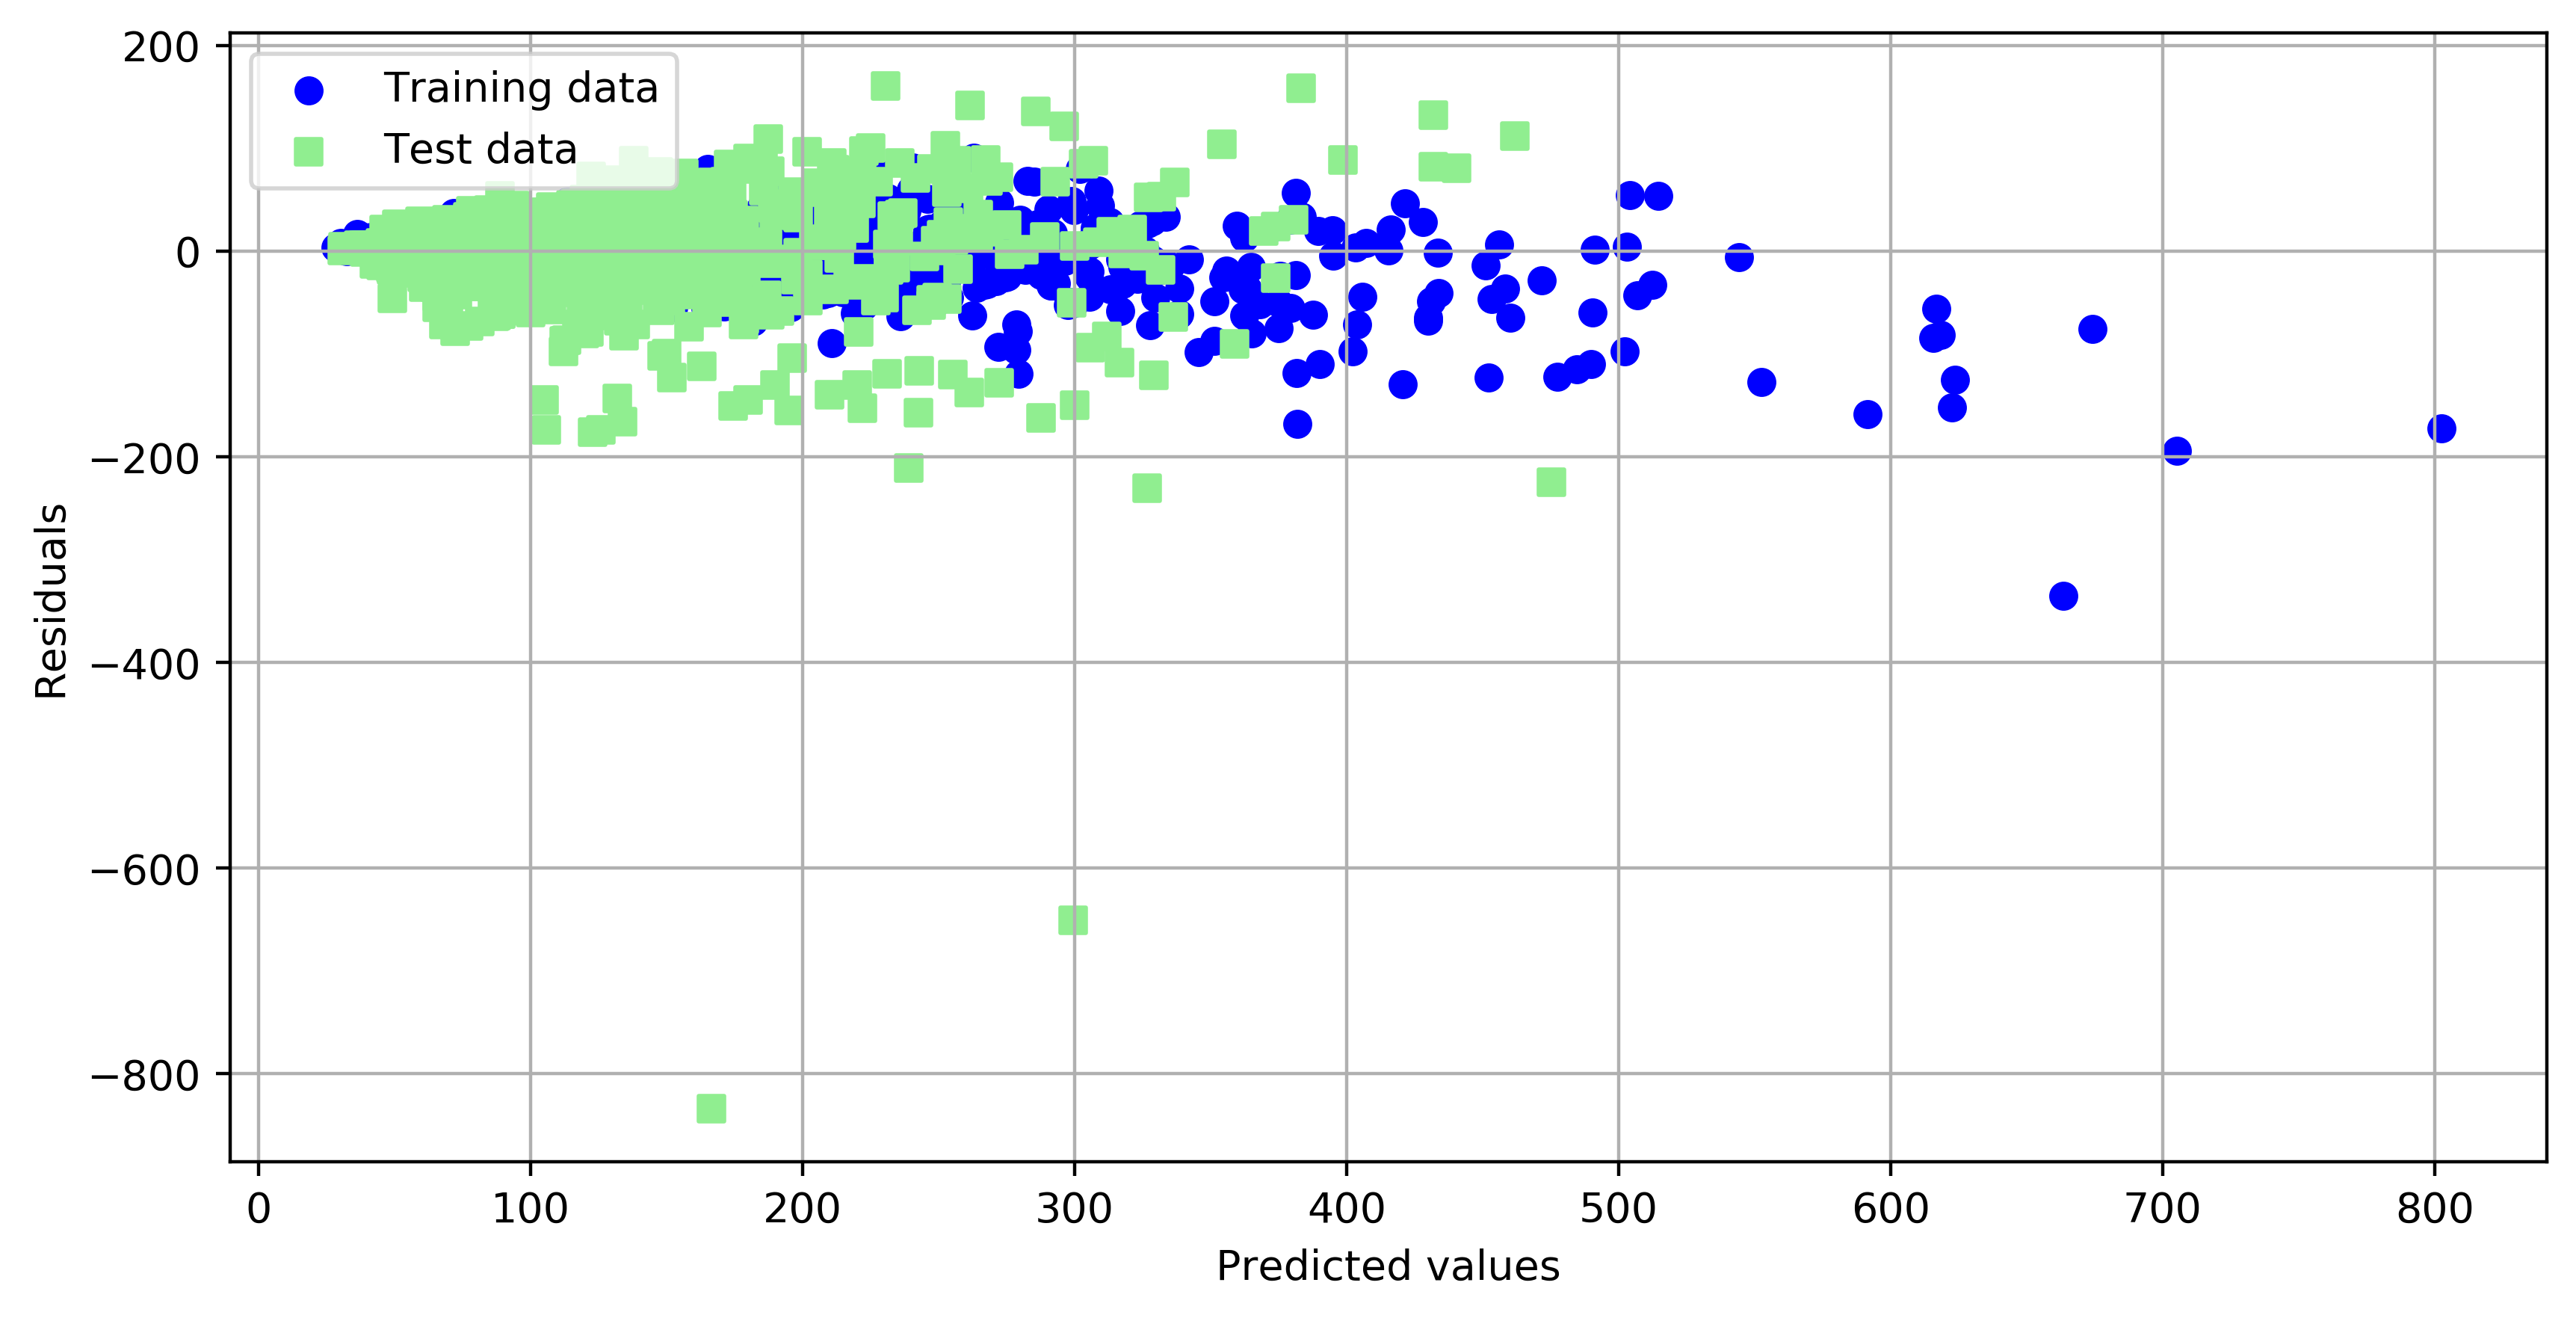

In [44]:
print('Predict Price with geo clustering:')
f = fit_random_forest(x, y)

Predict Price without geo clustering:
MSE train: 466.111, test: 3163.668
R2 score train: 0.944, test: 0.587


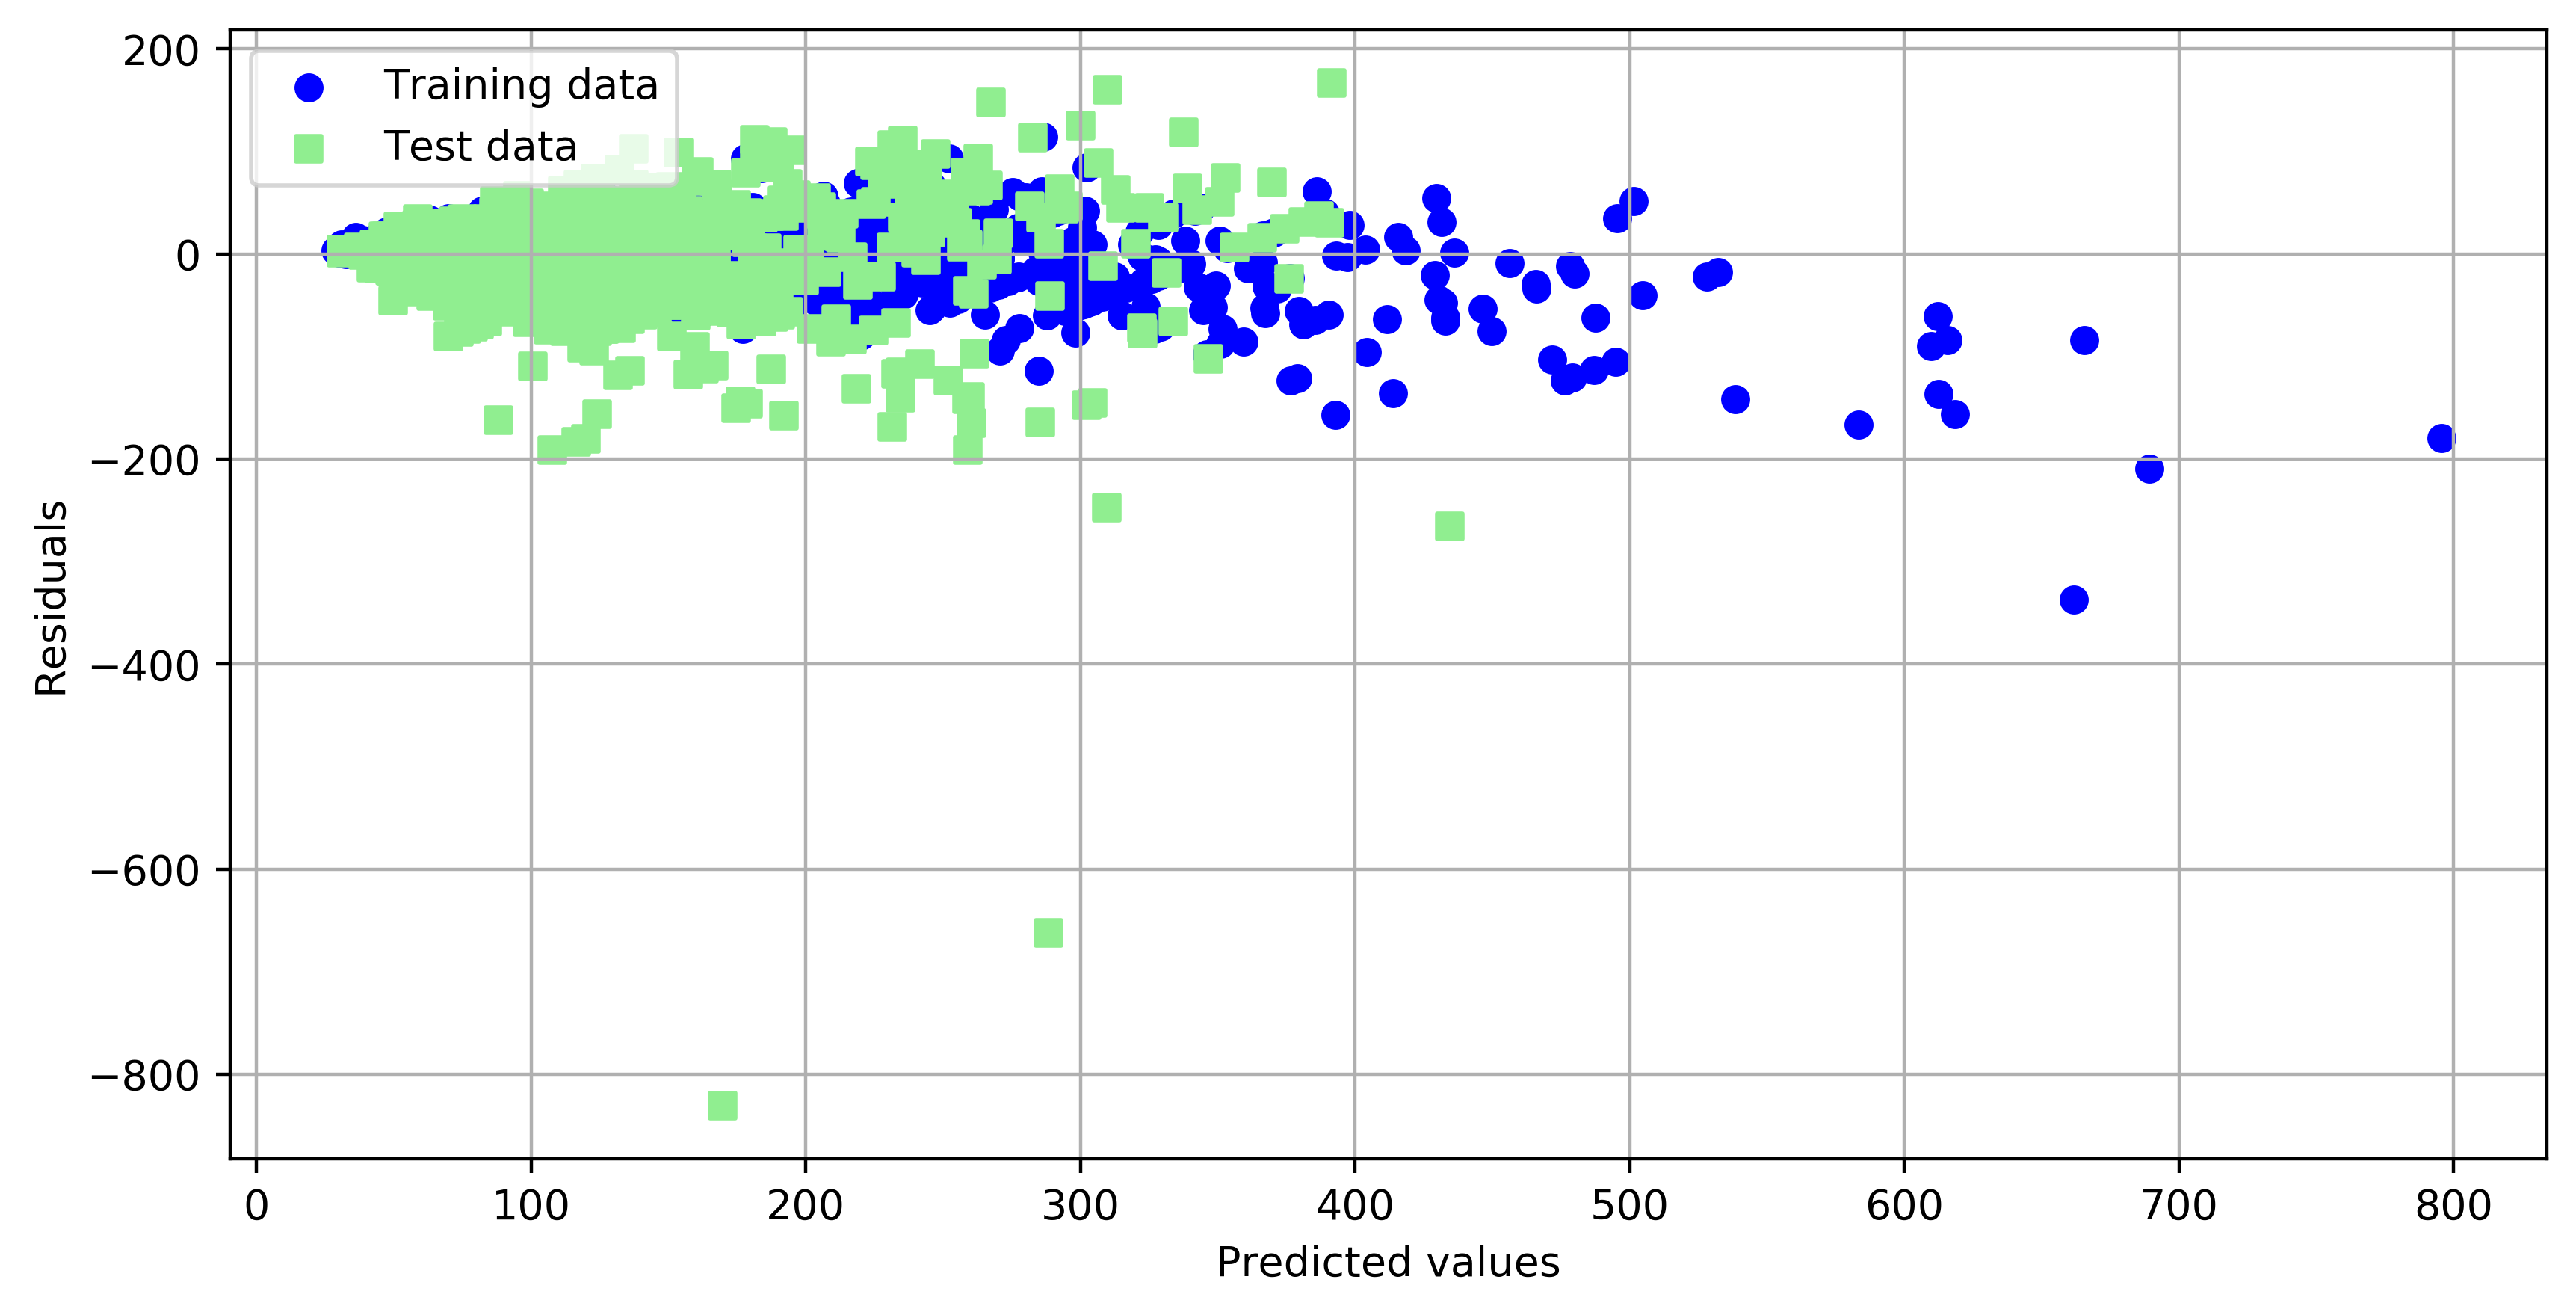

In [46]:
print('Predict Price without geo clustering:')
f_ = fit_random_forest(x_, y)

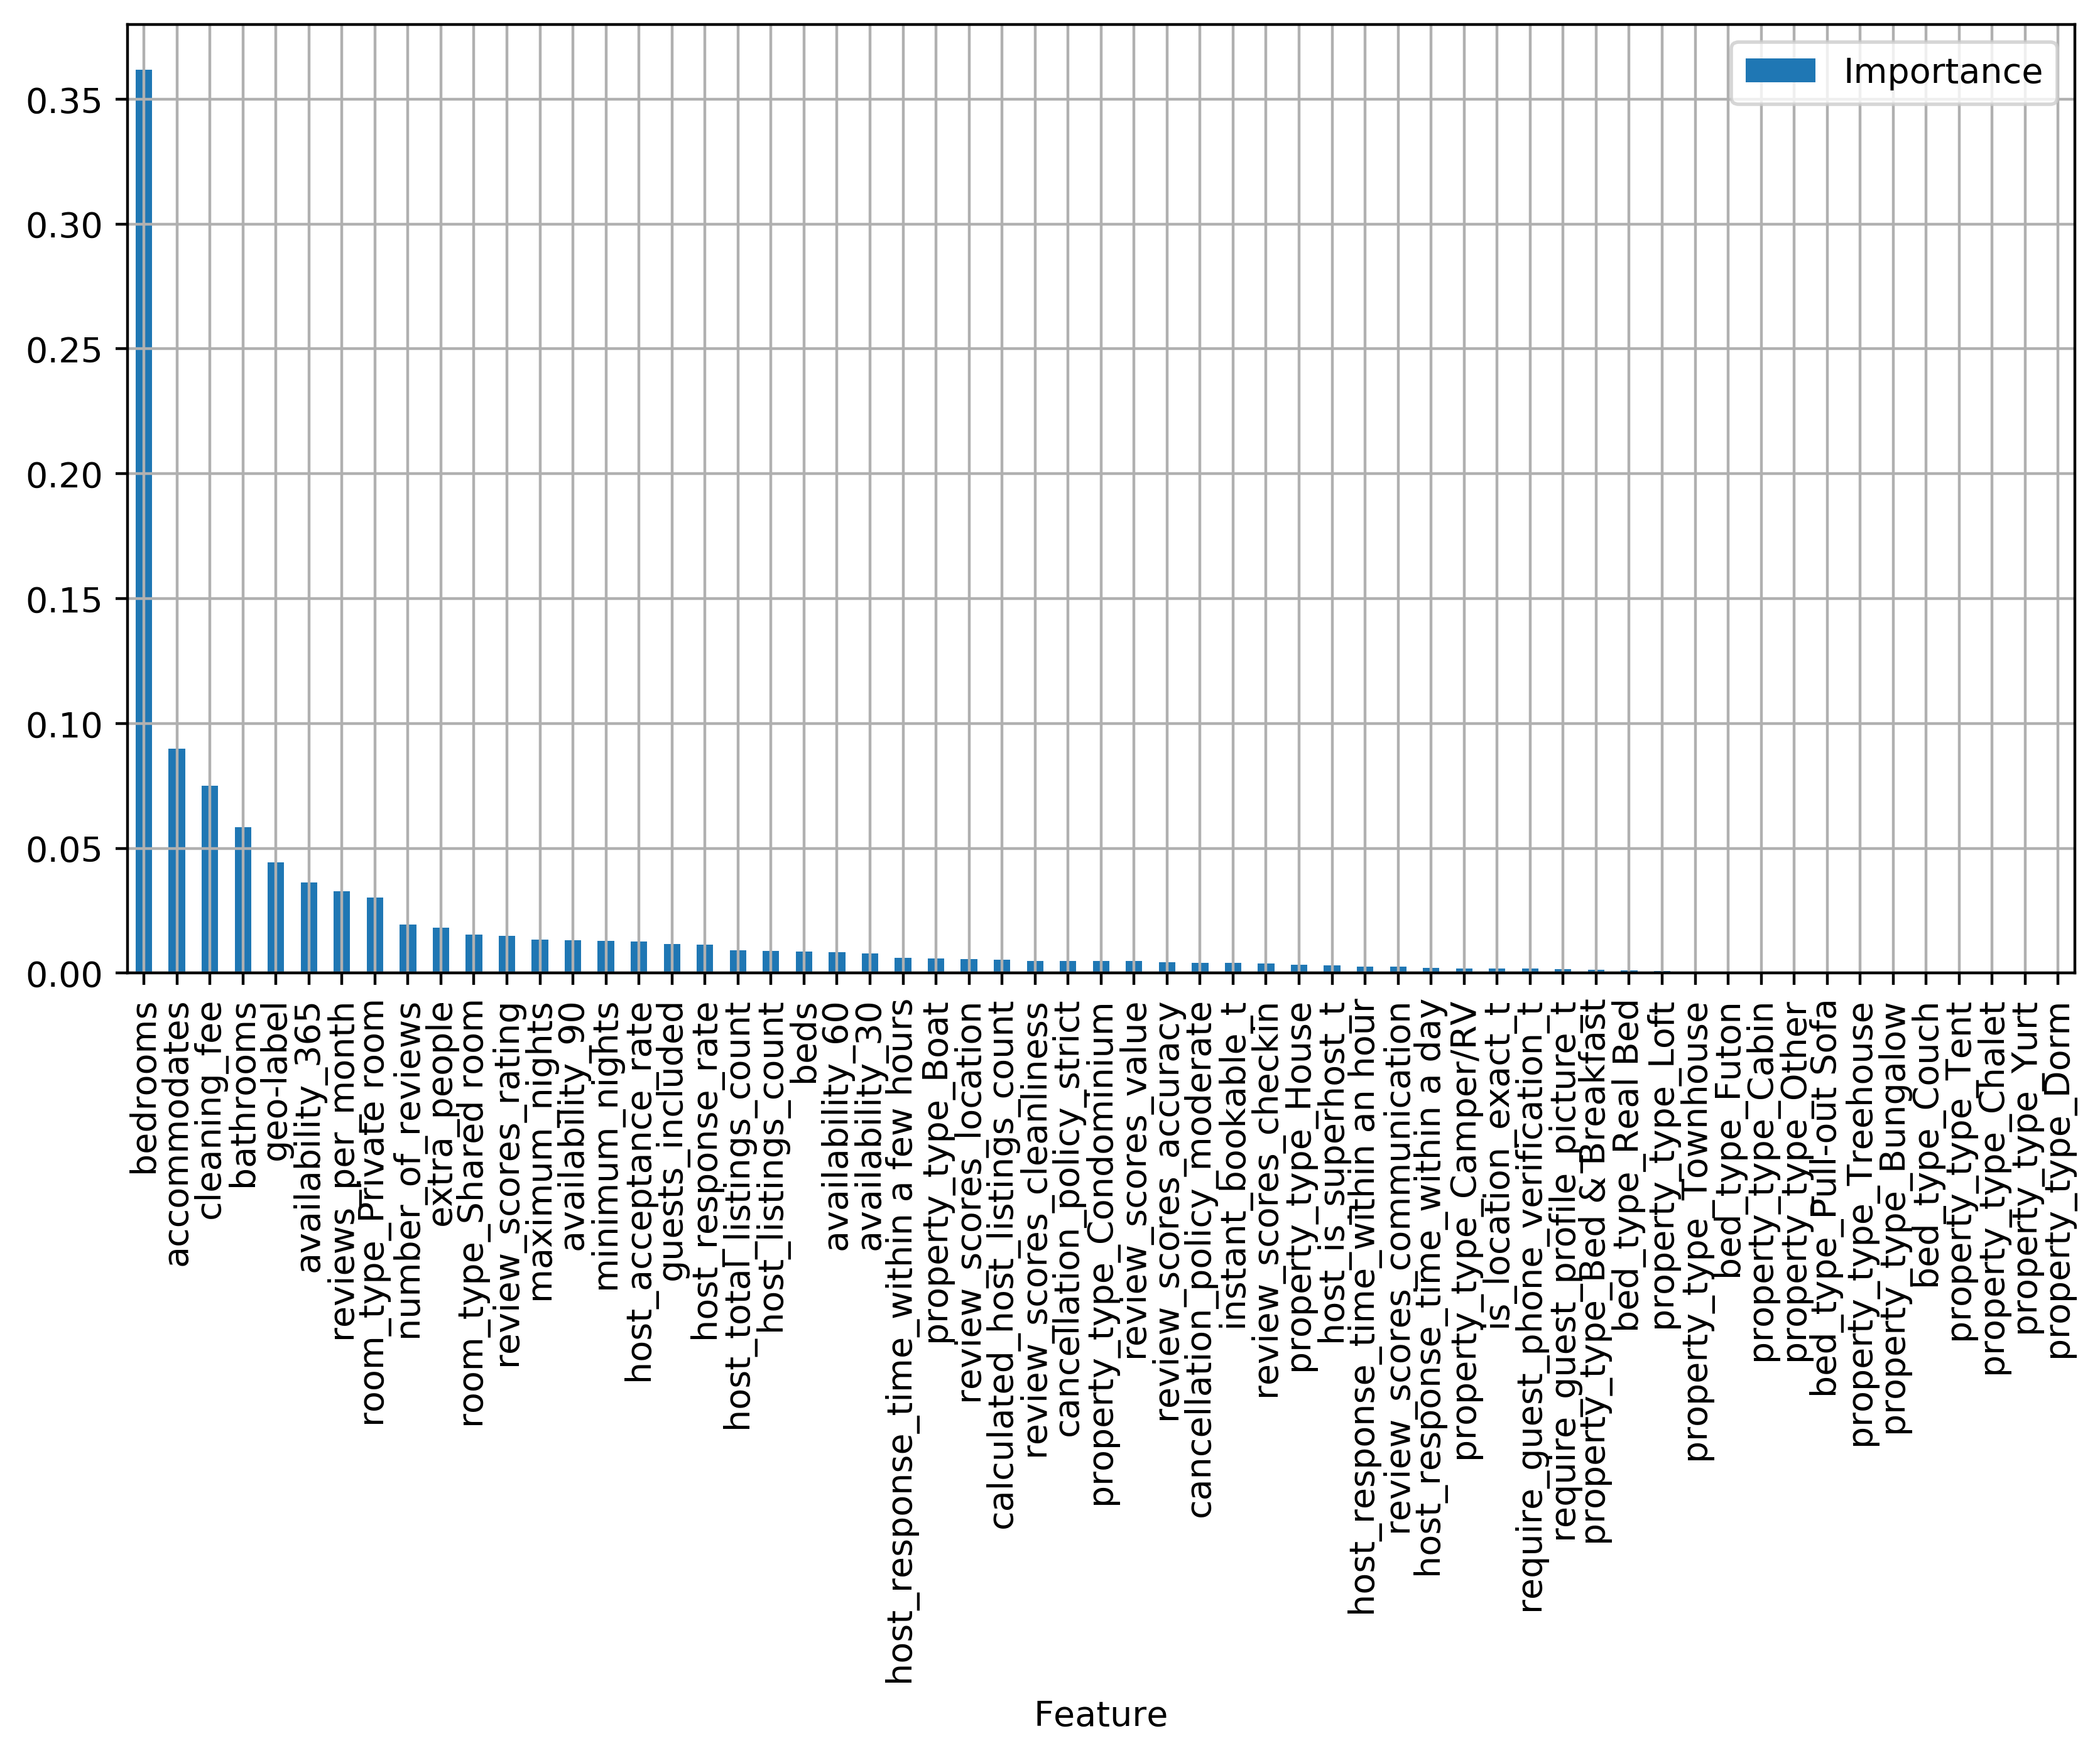

In [42]:
fig = plt.figure(figsize=(10,5), dpi=200)
ax = fig.gca()
df_result = pd.DataFrame({'Feature': x.columns, 'Importance': f.feature_importances_}).sort_values(by=['Importance'], ascending=False)
df_result.plot.bar( x='Feature', y='Importance', ax=ax)
ax.grid()

Conclusion:
- considering the geo-label, the random forest model got improved.
- analyzing the feature importance plot, the geo-label is the 5th important feature for predicting the price.
- although the geo cluster is not directly correlated with the price, it plays an important role in the model of predicting the price